<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/01_AR_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AR(p) 모델

- 만약 **AR(1) 모델**을 사용하려면 `lags=1`로 설정  
  ```python
  model = AutoReg(train["Close"], lags=1)


/tmp/ipython-input-2433316129.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed


📌 Training MSE: 82.3140, R²: 0.9762
📌 Test MSE: 5125.8919, R²: -0.7349


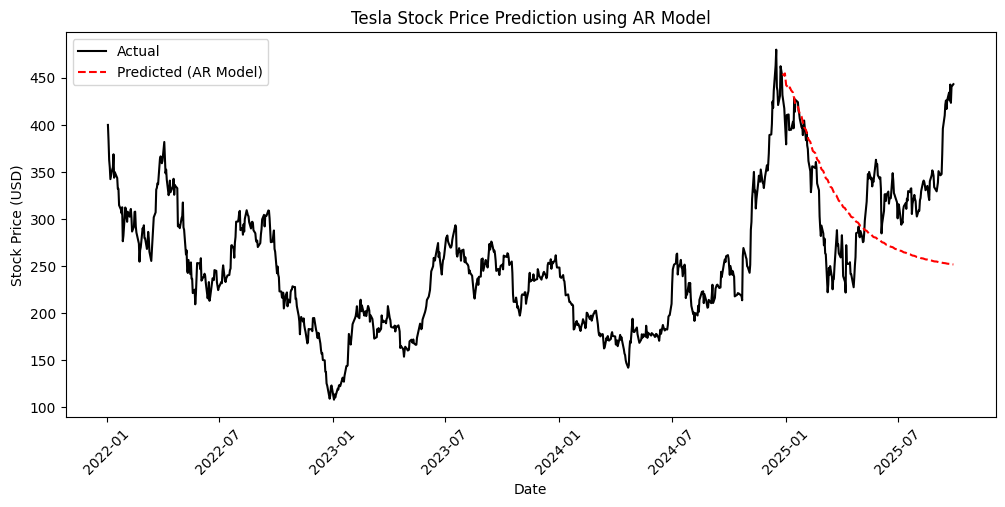

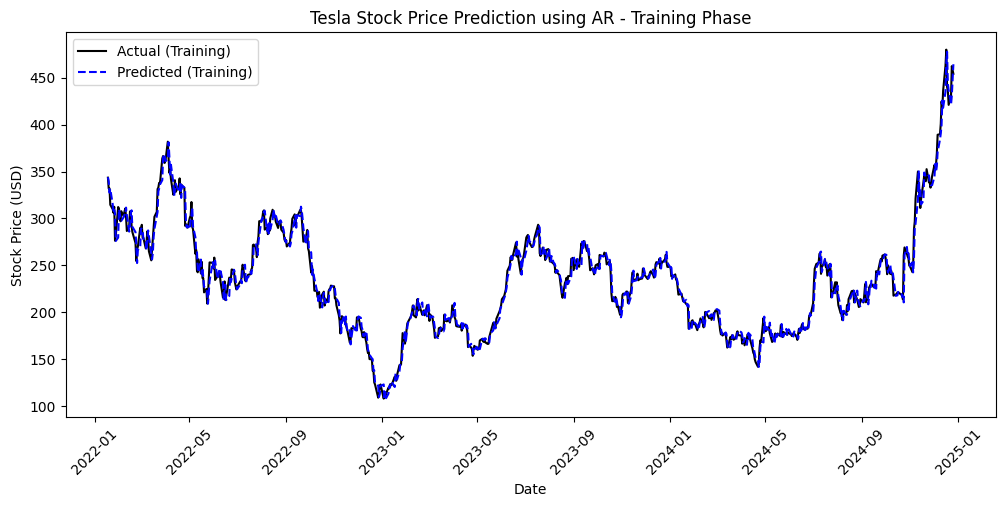

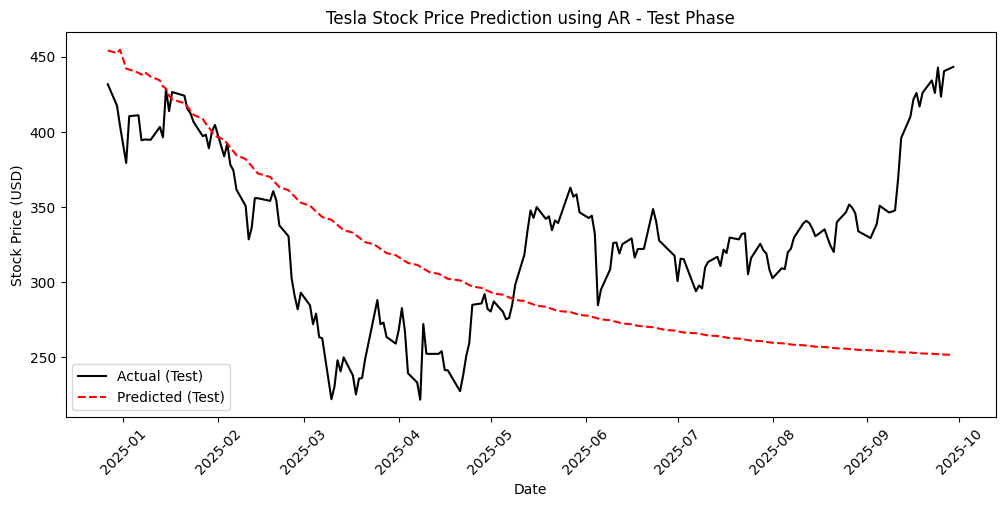

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 3년치)
df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 입력 변수(X) 및 출력 변수(y) 정의
X = df[["Day"]].values  # 날짜를 입력 변수로 사용
y = df["Close"].values  # 종가(Close)를 예측할 목표 변수로 사용

# 📌 4️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# 📌 5️⃣ AR(자동회귀) 모델 학습
lag = 10  # AR 모델의 시차 설정
model = AutoReg(train["Close"], lags=lag)
model_fit = model.fit()

# 📌 6️⃣ 예측 수행
train_pred = model_fit.predict(start=lag, end=len(train) - 1)  # 훈련 데이터 예측
test_pred = model_fit.predict(start=len(train), end=len(df) - 1)  # 테스트 데이터 예측

# 📌 7️⃣ 성능 평가
train_mse = mean_squared_error(train["Close"][lag:], train_pred)
test_mse = mean_squared_error(test["Close"], test_pred)
train_r2 = r2_score(train["Close"][lag:], train_pred)
test_r2 = r2_score(test["Close"], test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 8️⃣ 결과 시각화 (전체 데이터 예측)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (AR Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using AR Model")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 9️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(train["Date"][lag:], train["Close"][lag:], label="Actual (Training)", color="black")
plt.plot(train["Date"][lag:], train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using AR - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(test["Date"], test["Close"], label="Actual (Test)", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using AR - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()
